# Datos de Panel

Los datos de panel son un conjunto de datos que se recopilan durante un período de tiempo para uno o más individuos o "casos" identificables de forma única. En la terminología de datos de panel, cada individuo o "caso, se denomina unidad.

Para construir una base de datos en este estado, los investigadores miden uno o más variables para cada unidad y registran sus valores en un formato tabular, en el que cada fila representa una unidad única, cada columna contiene los datos de una de las variables y el eje contiene la secuencia de períodos de tiempo durante los cuales la unidad ha sido rastreada o monitoreada.

En un conjunto de datos de panel, el conjunto de puntos de datos pertenecientes a una unidad se denomina grupo y a menudo, requiere que los datos sean indexados como grupo.

<img src="panel_data.png" width="400">

Como podemos observar, lo que resulta de este ejercicio es una base para la cual, cada estado de los EEUU, identificados por la columna de: id_estado o la "unidad", ha sido monitoreada durante la misma cantidad de períodos de tiempo, lo que da como resultado lo que se denomina un panel equilibrado. Por ello, un requisito fundamental en los datos de panel es que, se disponga de de una columna para identificar al caso y de otra columna para identificar a la unidad de tiempo.

El conjunto de datos anterior también es un ejemplo de un panel fijo (en lugar de un panel giratorio) porque estamos rastreando el mismo conjunto de estados en cada período de tiempo.


#### Datos de sección trasnversal

Los datos transversales se describen como una observación de múltiples objetos y variables correspondientes en un punto específico en el tiempo, por lo que los datos de series temporales solo observan un objeto de forma recurrente a lo largo del tiempo. 

<img src="coss_sectional.png" width="350">

#### Entonces:¿Cuál es el beneficio de este tipo de modelos?

La regresión con datos de panel puede mitigar el sesgo de variable omitida cuando no hay información sobre las variables que se correlacionan tanto con la variable objetivo como con la variable independiente. Siempre que se disponga de datos de panel, los métodos de regresión de panel pueden mejorar los modelos de regresión múltiple.

En sí, el problema que puede ocasionarse de no usar datos de panel es la heterogeneidad y endogeneidad resultante, conceptos familiares si revisamos los supuestos de la Regresión Lineal en la semana No.1. 


#### Heterogenidad y endogenidad

El problema de heterogenidad y endogenidad es causado por la heterogeneidad no observada. Así, la dependencia no observada de otras variables independientes se denomina heterogeneidad no observada y la correlación entre las variables independientes y el término de error se denomina endogeneidad.

Afortunadamente, podemos recurrir a los modelos de datos de panel para controlar la heterogeneidad en nuestro modelo de regresión al reconocer heterogeneidad fija o aleatoria. 

Dentro de los datos de panel, los dos modelos más comunes son los de Efectos Fijos y Efectos aleatorios.  En el primero, se suponen que la variable explicativa tiene una relación fija o constante con la variable de respuesta en todas las observaciones, mientras que en el modelo de Efectos aleatorios se supone que las variables explicativas tienen relaciones fijas con la variable de respuesta en todas las observaciones, pero que estos efectos fijos pueden variar de una observación a otra.

## Modelo de Efectos Fijos "fixed effects"

El modelo de Regresión de Efectos Fijos se utiliza para estimar el efecto de las características intrínsecas de los individuos en un conjunto de datos de panel que no son directamente observables o medibles. Para ello, se busca mediante esta metodología,  estimar sus efectos para mejorar la calidad del análisis. Matemáticamente viene definido como:

$$ Y_{it} = \beta_0 + \beta_1 X_{it} + \beta_2 Z_i +  u_{it}$$

Donde:
- 𝑌𝑖𝑡 es una matriz de tamaño [T x 1] que contiene las T observaciones para la unidad 
- 𝑋𝑖𝑡 es una matriz de tamaño [T x k] que contiene los valores de "k" variables de regresión, observables y relevantes
- 𝛽1 es una matriz de tamaño [k x 1] que contiene los valores de la población de los coeficientes de regresión para las primera variables de regresión
- 𝑍𝑖 es una matriz de tamaño [T x m]son heterogeneidades invariantes en el tiempo no observadas entre las entidades
- 𝑢𝑖𝑡 es una matriz de tamaño [T x 1] que contiene los errores correspondientes a las T observaciones para la unidad i

Cabe recalcar, que tal como en la Rgeresión Lineal simple, el modelo de Efectos Fijos también puede generalizarse para incluir más determinantes de "y" que están correlacionados con "X" y que varían en el tiempo.

## Modelo de Efectos Aleatorios "random effects"

El modelo de regresión de efectos aleatorios es útil para para estimar el efecto de las características específicas de la unidad, que son intrínsecamente imposibles de medir. En otras palabras, es entonces una técnica para estudiar el efecto de las características específicas del individuo en la variable de respuesta del conjunto de datos del panel. Matemáticamente está definido como:

$$\begin{align}
Y_{it} = \beta_1 X_{1,it} + \cdots + \beta_k X_{k,it} + \alpha_i + u_{it}
\end{align}
$$


Donde los 𝛼𝑖 son las intersecciones específicas de la entidad que capturan heterogeneidades entre entidades.

Nuestro objetivo dentro de este modelo es estimar los 𝛽, que es el efecto de 𝑋𝑖 en 𝑌𝑖, manteniendo constante los cambios en 𝑍𝑖. Dado que 𝛼𝑖, son interceptos específicos individuales, estos se interpretan como el efecto fijo de entidad "i". He aquí el nombre del modelo "efectos fijos".

## Los datos

Para cerrar el curso el día de hoy, y teniendo en cuenta que estos modelos concentran sus esfuerzos en bases de datos de corte econométrico, trabajaremos con una base que contiene 1173 observaciones y 11 variables para un total de 51 estados, por año desde 1977 a 1999”. 

Para descargarla, pueden dirigirse directamente a: https://github.com/saivishnuk/Data-Science/blob/master/Do_more_guns_reduce_violence_crime_rate/guns.csv o descargarla de R mediante el comando data("Guns").

#### Importar los modules requeridos

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a linearmodels, el módulo encargado de la modelación para datos de panel en Python.

<img src="panel_models.png" width="650">

Ahora, llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [4]:
df=pd.read_csv("guns.csv")
df

,year,vio,incarc_rate,pb1064,pw1064,pm1029,pop,avginc,density,stateid,shall
0,77,414.399994,83,8.384873,55.122906,18.174412,3.780403,9.563148,0.074552,1,0
1,78,419.100006,94,8.352101,55.143665,17.994080,3.831838,9.932000,0.075567,1,0
2,79,413.299988,144,8.329575,55.135857,17.839336,3.866248,9.877028,0.076245,1,0
3,80,448.500000,141,8.408386,54.912586,17.734198,3.900368,9.541428,0.076829,1,0
4,81,470.500000,149,8.483435,54.925125,17.673716,3.918531,9.548351,0.077187,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1168,95,254.199997,254,1.485849,73.716209,15.370982,0.478447,14.070156,0.004927,56,1
1169,96,249.699997,289,1.521814,73.857964,15.446014,0.480085,14.032229,0.004944,56,1
1170,97,255.199997,310,1.527818,73.927307,15.493999,0.480031,14.790977,0.004943,56,1
1171,98,247.600006,326,1.558396,73.985146,15.510213,0.480045,15.225509,0.004944,56,1


#### Recodificar el nombre de las columnas a español

Como es habitual procedamos a reemplazar los nombres de las columnas a español:

In [5]:
df.rename({'year':'anio', 'vio': 'tasa_crimen_violento', 'incarc_rate':'rasa_encarcelamiento', 
           'pb1064': 'tasa_pob_negra', 'pw1064':'tasa_pob_caucasica', 'pm1029':'tasa_pob_cmasculina',
           'pop':'poblacion', 'avginc': 'ingresos_promedios', 'density':'densidad_poblacional', 'stateid':'id_estado', 
           'shall':'ley' }, axis=1, inplace=True)

Para simplificar el análisis limitemos las variables explicativas a 4: el año y estado en donde se recogió la información, el ingreso promedio y la tasa de crimen violento:

In [6]:
df=df[['anio', 'tasa_crimen_violento', 'ingresos_promedios', 'id_estado']]
df

,anio,tasa_crimen_violento,ingresos_promedios,id_estado
0,77,414.399994,9.563148,1
1,78,419.100006,9.932000,1
2,79,413.299988,9.877028,1
3,80,448.500000,9.541428,1
4,81,470.500000,9.548351,1
...,...,...,...,...
1168,95,254.199997,14.070156,56
1169,96,249.699997,14.032229,56
1170,97,255.199997,14.790977,56
1171,98,247.600006,15.225509,56


En el conjunto de datos anterior, se realiza un seguimiento de cada país (la "unidad") durante la misma cantidad de períodos de tiempo, lo que da como resultado lo que se denomina un panel equilibrado. Un panel desequilibrado o desequilibrado es aquel en el que se rastrean diferentes unidades durante diferentes períodos de tiempo.

El conjunto de datos anterior también es un ejemplo de un panel fijo (en lugar de un panel giratorio) porque estamos rastreando el mismo conjunto de países en cada período de tiempo.

En el resto de este capítulo, veremos paneles de datos fijos y balanceados.

En un conjunto de datos de panel, el conjunto de puntos de datos pertenecientes a una unidad se denomina grupo. A menudo, las palabras unidad y grupo se usan indistintamente en discusiones sobre conjuntos de datos de panel.

Volviendo al conjunto de datos del Banco Mundial, supongamos que deseamos estudiar la relación entre el crecimiento de la formación bruta de capital y el crecimiento del PIB de un país. Con ese fin, formamos el siguiente objetivo de regresión:

In [7]:
df.describe()

,anio,tasa_crimen_violento,ingresos_promedios,id_estado
count,1173.000000,1173.000000,1173.000000,1173.000000
mean,88.000000,503.074681,13.724796,28.960784
std,6.636079,334.277195,2.554543,15.683522
min,77.000000,47.000000,8.554884,1.000000
25%,82.000000,283.100006,11.934755,16.000000
50%,88.000000,443.000000,13.401551,29.000000
75%,94.000000,650.900024,15.271010,42.000000
max,99.000000,2921.800049,23.646713,56.000000


In [8]:
df.isna().sum()

anio                    0
tasa_crimen_violento    0
ingresos_promedios      0
id_estado               0
dtype: int64

Recordemos que en datos de panel, requerimos especificar los índice para nuestra base de datos. En este caso, setiaremos al año y al codificado de estado como referencia.

In [9]:
df=df.set_index(['anio', 'id_estado'])

In [10]:
anios = df.index.get_level_values('anio').to_list()
df['anio'] = pd.Categorical(anios)

Listo, una vez que tenemos nuestra base de datos, nuestro punto de partida en este tipo de análisis siempre será un modelo simple OLS sobre nuestros datos de panel, en el cual, ignoraremos el tiempo y las características individuales, y se enfocará únicamente en las dependencias entre los individuos. Cuando obtengamos el modelo simple, debemos siempre verificar que no haya correlación o endogeneidad en los errores.

## Pooled OLS

Iniciaremos con este tipo de modelo como base, ya que si se violan las condiciones especificadas previamente, los modelos de efectos fjos o efectos aleatorios serán más adecuados. 

Para ello, importamos al sub-module PooledOLS y a la funcionalidad de Python que nos permite expresar el modelo con notación de fórmula. 

In [11]:
from linearmodels import PooledOLS
import statsmodels.api as sm

In [12]:
X = sm.tools.tools.add_constant(df.ingresos_promedios)
y = df.tasa_crimen_violento

In [13]:
modelo1 = PooledOLS(y, X)
resultados_pooled_OLS = modelo1.fit(cov_type='clustered', cluster_entity=True)

In [14]:
# Store values for checking homoskedasticity graphically
predicciones_pooled_OLS = resultados_pooled_OLS.predict().fitted_values
residuos_pooled_OLS = resultados_pooled_OLS.resids

In [15]:
resultados_pooled_OLS

Dep. Variable:,tasa_crimen_violento,R-squared:,0.1665
Estimator:,PooledOLS,R-squared (Between):,-0.0847
No. Observations:,1173,R-squared (Within):,0.1758
Date:,"Wed, Oct 26 2022",R-squared (Overall):,0.1665
Time:,05:38:26,Log-likelihood,-8374.6
Cov. Estimator:,Clustered,,
,,F-statistic:,233.84
Entities:,23,P-value,0.0000
Avg Obs:,51.000,Distribution:,"F(1,1171)"
Min Obs:,51.000,,
Max Obs:,51.000,F-statistic (robust):,75.562


Lo primero que hay que tener en cuenta en los resultados del modelo, es que el valor de los coeficientes ajustados, en este caso los ingresos promedios, son significativos, lo cual es un buen indicador. 


Adicionalmente, podemos fijarnos en el R-cuadrado ajustado que mide la fracción de la varianza total en "y" que es explicada por "X" después de tener en cuenta los grados de libertad perdidos debido a la inclusión de variables de regresión es 0.17, bastante bajo.

La prueba F para la regresión que mide la significación conjunta de los parámetros del modelo ha producido una estadística de prueba de 233.84 con un valor p de 0, lo que nos lleva a concluir que las estimaciones del coeficiente del modelo son significativas en conjunto con una p < 0.005 .

El Log-verosimilitud del modelo es -8374.6.  Este valor de bondad de ajuste por sí mismo no es repesentativo a menos que lo comparemos con los de un modelo alternativo, por lo que a seguir  validamos los supuestos de homocedasticidad y no-autocrrelación y procedemos a desarrollar dos modelos extras: EL modelo de efectos fijos, y el modelo de efectos aleatorios.

### Verificación de los supuestos de la Regresión Pooled OLS

#### Homocedasticidad

Para validar este supuesto, primero graficaremos los residuos y validaremos la prueba gráfica con el test estadístico de  Breusch-Pagan.

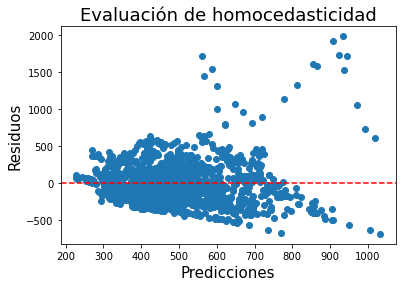

In [16]:
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS, residuos_pooled_OLS)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

De la gráfica, y como los puntos se dispersan, tenemos un indicador de varianza creciente y, por lo tanto, de heteroscedasticidad. 

Comprobemos esta intuición gráfcia con el test de Breusch-Pagan:

In [17]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [18]:
pooled_OLS_df = pd.concat([df, residuos_pooled_OLS], axis=1)
pooled_OLS_df = pooled_OLS_df.drop(['anio'], axis = 1).fillna(0)
X_ = sm.tools.tools.add_constant(df['ingresos_promedios']).fillna(0)

In [19]:
pooled_OLS_df

,,tasa_crimen_violento,ingresos_promedios,residual
anio,id_estado,,,
77,1,414.399994,9.563148,133.505144
78,1,419.100006,9.932000,118.513100
79,1,413.299988,9.877028,115.647932
80,1,448.500000,9.541428,168.764774
81,1,470.500000,9.548351,190.395136
...,...,...,...,...
95,56,254.199997,14.070156,-267.312584
96,56,249.699997,14.032229,-269.787775
97,56,255.199997,14.790977,-304.795414


In [20]:
breusch_pagan = het_breuschpagan(pooled_OLS_df.residual, X_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 110.96166123874887, 'LM p-val': 6.032614548331739e-26, 'F-Stat': 122.34596489438498, 'F p-val': 4.048135806870943e-27}


Como el p-valor del estadístico de Breush-Pagan es < 0.05 (6.032614548331739e-26), entonces se rechaza la hipótesis nula, y por lo tanto estamos en la presencia de heterocedasticidad en el término del error.

- Ho:Las varianzas del error son iguales, hay presencia de homocedasticidad
- Hi:Las varianzas del error no son iguales, hay presencia de heterocedasticidad

#### No- autocorrelación

Para validar este supuesto, utilizaremos la prueba de Durbin Watson. Recordemos que para probar la no-autocorrelación en esta prueba, la prueba de Durbin-Watson devolverá un resultado entre 0 y 4:

- El valor medio de dos, indicaría que no se ha identificado una autocorrelación, 
- 0 - 2 significa una autocorrelación positiva (cuanto más cerca de cero, mayor es la correlación), y 
- 2 - 4 significa autocorrelación negativa (cuanto más cerca de cuatro, mayor es la correlación)

In [21]:
from statsmodels.stats.stattools import durbin_watson

In [22]:
durbin_watson = durbin_watson(pooled_OLS_df.residual) 
print(durbin_watson)

0.08937263330524356


En nuestro ejercicio, el resultado es 0,0893, lo que indica claramente una fuerte autocorrelación positiva, violándose el supuesto.

Como las dos secciones del tercer supuesto fueron contradichas, a seguir exploraremos los modelos de efectos fijos y efectos aleatorios:

## Modelo de Efectos Fijos "fixed effects"

In [23]:
from linearmodels import PanelOLS

In [24]:
modelo_fe = PanelOLS(y, X, entity_effects = True)
resultados_fe = modelo_fe.fit()

In [25]:
resultados_fe

Dep. Variable:,tasa_crimen_violento,R-squared:,0.1817
Estimator:,PanelOLS,R-squared (Between):,-0.4633
No. Observations:,1173,R-squared (Within):,0.1817
Date:,"Wed, Oct 26 2022",R-squared (Overall):,0.1585
Time:,05:39:28,Log-likelihood,-8342.3
Cov. Estimator:,Unadjusted,,
,,F-statistic:,255.07
Entities:,23,P-value,0.0000
Avg Obs:,51.000,Distribution:,"F(1,1149)"
Min Obs:,51.000,,
Max Obs:,51.000,F-statistic (robust):,255.07


## Modelo de Efectos Aleatorios "random effects"

In [26]:
from linearmodels import RandomEffects

In [27]:
modelo_re = RandomEffects(y, X)
resultados_re = modelo_re.fit()

In [28]:
resultados_re

Dep. Variable:,tasa_crimen_violento,R-squared:,0.1712
Estimator:,RandomEffects,R-squared (Between):,-0.2017
No. Observations:,1173,R-squared (Within):,0.1792
Date:,"Wed, Oct 26 2022",R-squared (Overall):,0.1655
Time:,05:39:31,Log-likelihood,-8362.1
Cov. Estimator:,Unadjusted,,
,,F-statistic:,241.96
Entities:,23,P-value,0.0000
Avg Obs:,51.000,Distribution:,"F(1,1171)"
Min Obs:,51.000,,
Max Obs:,51.000,F-statistic (robust):,241.96


Como ambos modelos devuelven resultados similares,  para seleccionar el modelo, aplicaremos el test de Hausman.

#### Test de Haussman

La prueba de Hausman detecta regresores endógenos (variables predictoras) en un modelo de regresión. 

Las variables endógenas tienen valores que están determinados por otras variables en el sistema, en su presencia, los estimadores de mínimos cuadrados ordinarios fallarán, ya que se estaría violando el supuesto de OLS, que es: no correlación entre una variable predictora y el término de error. 
Para corregirlo, los estimadores de variables instrumentales se pueden utilizar como alternativa en este caso. Sin embargo, antes de que pueda decidir cuál es el mejor método de regresión, primero debe averiguar si sus variables predictoras son endógenas. Esto es lo que hará la prueba de Hausman.

En el análisis de datos de panel, la prueba de Hausman puede asistirnos a elegir entre un modelo de efectos fijos o un modelo de efectos aleatorios contrastando las siguientes hipótesis:

- Ho: El modelo preferido es el de efectos aleatorios
- Hi: El modelo preferido es el de efectos fijos

Esencialmente, las pruebas buscan ver si existe una correlación entre los errores únicos y los regresores en el modelo. La hipótesis nula en este caso vendría dadaa por la no correlación entre los dos.

In [29]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [30]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [31]:
hausman = hausman(resultados_fe, resultados_re) 

In [32]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 19.61518516402507
degrees of freedom: 2
p-Value:5.503217289584829e-05


Listo!, dado que el valor p es muy pequeño (5.503217289584829e-05), la hipótesis nula puede rechazarse. En consecuencia, el modelo de efectos fijos parece ser el más adecuado, porque claramente tenemos presencia de endogeneidad en nuestro modelo.